# <center>Оценка качества кластеризации. Внутренние меры
К сожалению, оценить качество кластеризации сложно, поскольку, в отличие от регрессии или классификации, при кластеризации у нас не всегда есть эталонные ответы, с которыми можно сравнить результаты предсказаний.

Выделяют две больших группы методов, с помощью которых можно оценить результат кластеризации:

>**Внутренние меры** — это метрики, которые оценивают качество кластеризации только по той информации, которая есть в неразмеченных данных.
>
>**Внешние меры** — это метрики, которые используют, если в данных есть информация о некотором заранее известном разделении на кластеры, с которым можно сравнить полученный результат.

Из-за большого количества признаков разбиение на кластеры может получиться некачественным и необходимо уменьшать размерность данных.

В библиотеке `sklearn` реализованы три наиболее популярные метрики:

* коэффициент силуэта (Silhouette Coefficient);
* индекс Калински — Харабаса (Calinski-Harabasz Index);
* индекс Дэвиса — Болдина (Davies-Bouldin Index).

# <center>Коэффициент силуэта

Коэффициент силуэта вычисляется по следующей формуле:
$$ s_i = \frac{b_i - a_i}{\max(a_i, b_i)} $$
где:
* $a_i$ — среднее расстояние от данного объекта  до объектов из того же кластера;
* $b_i$ — среднее расстояние от данного объекта  до объектов из другого ближайшего кластера.

Для того чтобы найти итоговое значение коэффициента силуэта для выборки, необходимо найти значения для остальных объектов и найти среднее значение для них.

Значение коэффициента силуэта всегда находится в диапазоне [−1,1].

* Значение близко к −1: объекты в кластерах разрознены, и в целом кластерную структуру не удалось выделить.
* Значение близко к 0: кластеры пересекаются друг с другом.
* Значение близко к 1: чёткая кластерная структура с «плотными», отделёнными друг от друга кластерами.

Также мы можем изобразить распределение коэффициентов силуэта для объектов отдельных кластеров.

Например, визуализация для двух кластеров будет такой:

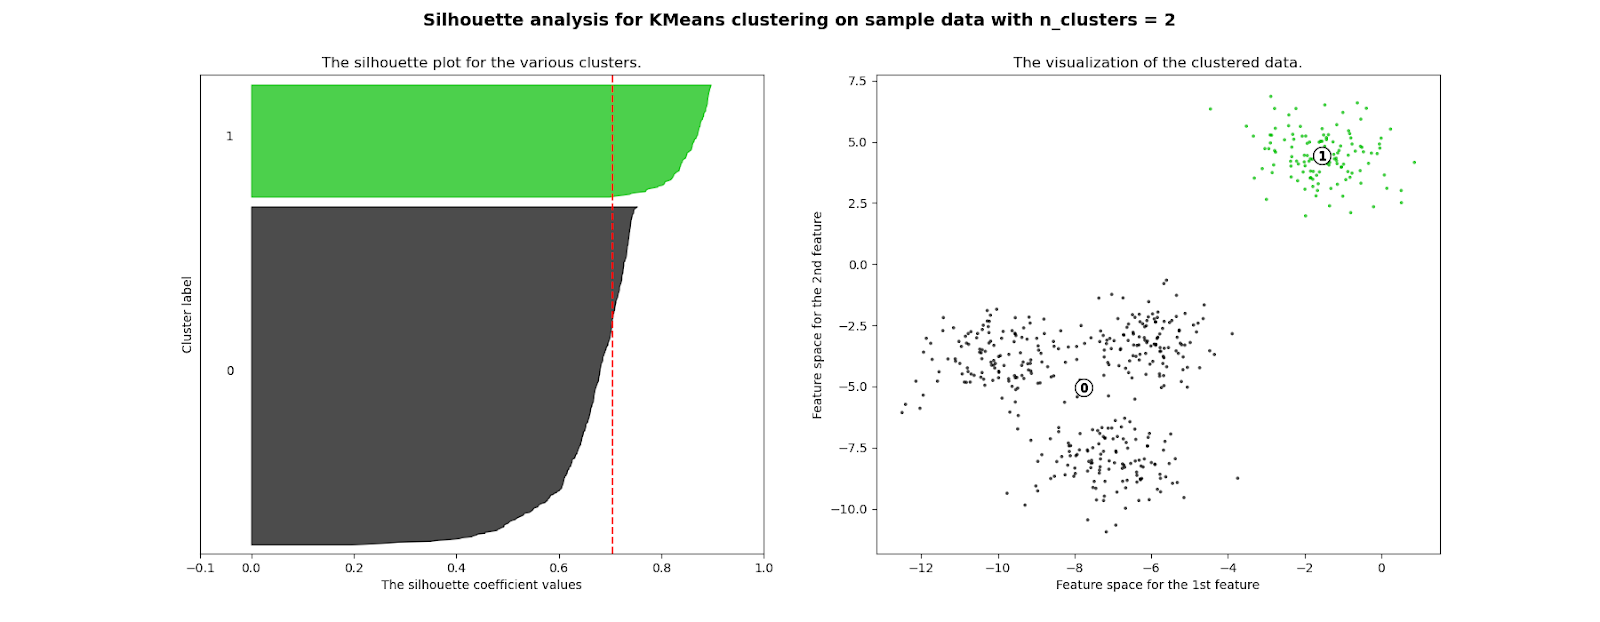  
На графике слева красной пунктирной линией здесь и далее отмечено среднее значение коэффициента силуэта для данного случая кластеризации. Разными цветами (серый и зелёный) визуализированы распределения значений коэффициентов силуэта для объектов соответствующих кластеров. На графике справа отмечены объекты, окрашенные в разные цвета в соответствии с их принадлежностью к кластерам.

Здесь мы видим, что «нулевой» кластер (серого цвета) включает в себя точки с более маленькими значениями. Это довольно хорошо соотносится с правой визуализацией, т. к. в сером кластере точки местами разрознены сильнее, чем в зелёном.

Для случая трёх кластеров ситуация будет следующей:

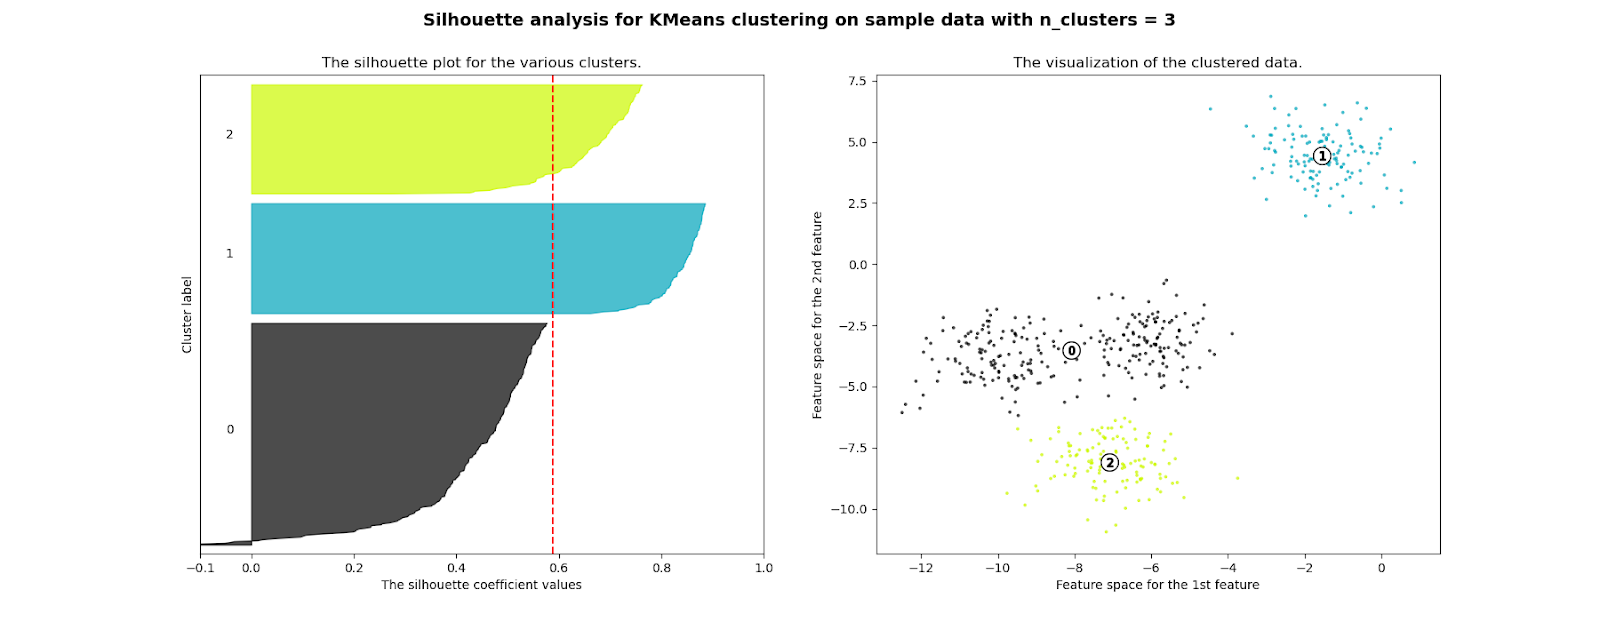

Довольно естественно (если посмотреть на график справа), что голубой кластер показывает наилучшую согласованность. У точек серого кластера коэффициенты всё так же самые низкие — явно напрашивается его разделение на ещё два кластера, и это действительно улучшает качество, так как значения коэффициентов силуэта увеличились (в новых сером и жёлтом кластерах они выше, чем были в предыдущем сером):

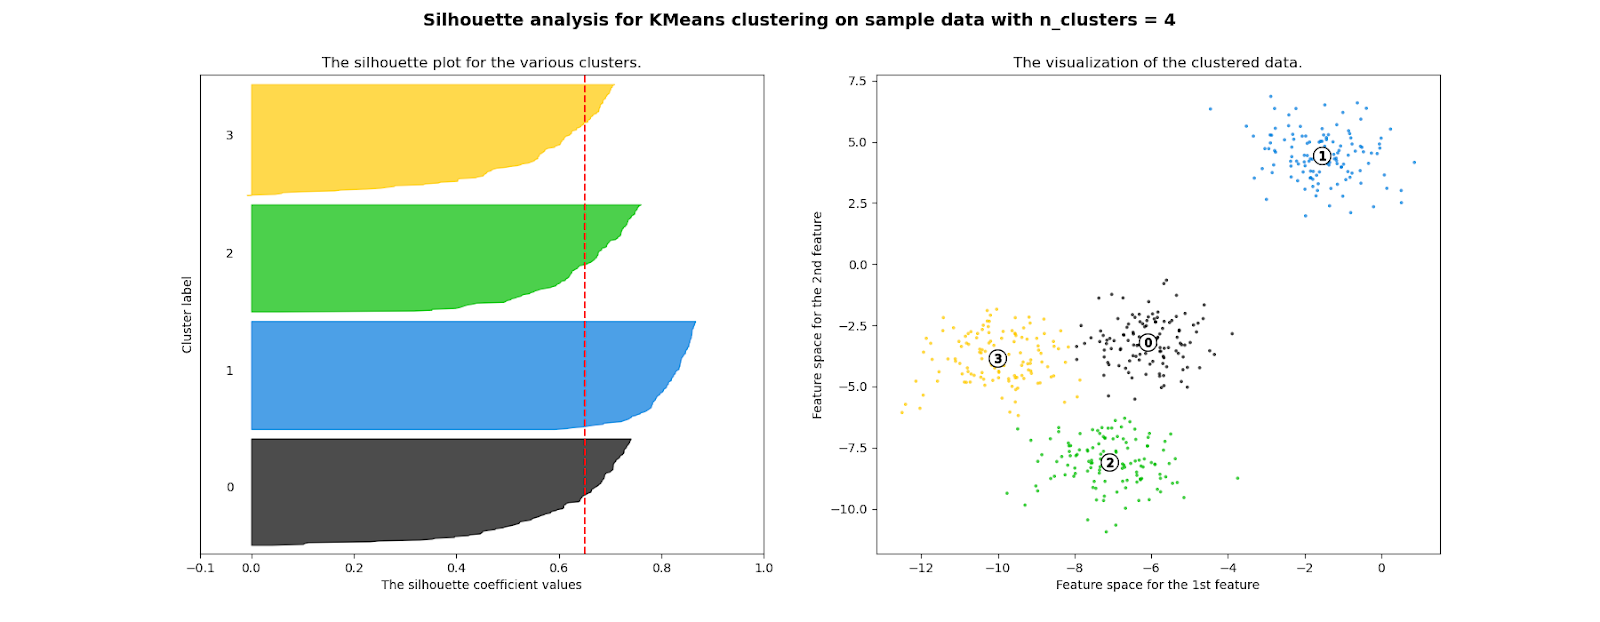

# <center>Индекс Калински-Харабаса
Он показывает отношение между разбросом значений между кластерами и разбросом значений внутри кластеров и вычисляется по следующей формуле:
$$ \frac{SS_B}{SS_W} \times \frac{N-K}{K-1} $$
* $N$ — общее количество объектов;
* $K$ — количество кластеров;
* $SS_B$ — взвешенная межкластерная сумма квадратов расстояний;
* $SS_W$ — внутрикластерная сумма квадратов расстояний.

**Первый шаг** — рассчитать взвешенную межкластерную сумму квадратов расстояний:
$$ SS_B = \sum^K_{k=1} n_k \times \|C_k - C\|^2 $$
* $n_k$ — количество наблюдений в кластере $k$;
* $C_k$ — центроид кластера $k$;
* $C$ — центроид всего набора данных;
* $K$ — количество кластеров.

**Второй шаг** — рассчитать внутрикластерную сумму квадратов.
$$ \sum_{i=1}^{n_k}\|X_{ik} - C_k\|^2 $$
* $n_k$ — количество наблюдений в кластере $k$;
* $X_{ik}$ — $i$-ое наблюдение в кластере $k$;
* $C_k$ — центроид кластера $k$.

Такое значение мы рассчитываем для каждого кластера, а потом уже складываем их для получения значения $SS_W$. 

Важно отметить, что нет никакого «приемлемого» порогового значения индекса — скорее, его можно использовать для того, чтобы сравнивать разные разбиения на кластеры между собой: более высокое значение индекса будет означать, что кластеры плотные (т. е. объекты внутри них находятся близко друг к другу) и хорошо разделены. Например, если бы мы отразили зависимость показателя индекса от количества кластеров, то по графику ниже могли бы сделать вывод, что оптимальное количество кластеров будет равно трём, так как именно для этого числа кластеров значение индекса наибольшее:

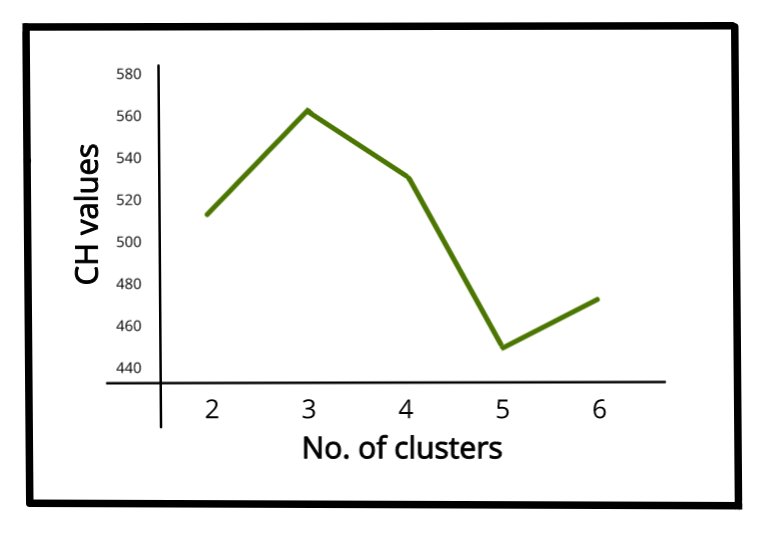

В библиотеке `sklearn` данный алгоритм реализуется с помощью метода `metrics.calinski_harabasz_score`.

# <center>Индекс Дэвиса-Болдина
**Первый шаг**

Для начала вычисляем для каждого кластера следующую **меру разброса значений** (в контексте этой формулы её называют **компактностью**) внутри него:
$$ S_k = \Big\{ \frac{1}{n_k}\sum_{i=1}^{n_k} |X_{ik} - C_k|^q \Big\}^{\frac{1}{q}} $$
* $n_k$ — количество наблюдений в кластере $k$;
* $X_{ik}$ — $i$-ое наблюдение в кластере $k$;
* $C_k$ — центроид кластера $k$;
* $q$ обычно принимает значение $2$ (в этом случае мы рассматриваем уже привычное нам евклидово расстояние).

**Второй шаг**

Далее находим **расстояния между центроидами кластеров** (этот показатель называют **отделимостью**):
$$ M_{ij} = \|C_i - C_j\|_q $$
Будем считать, что мы работаем с тремя кластерами. Используя приведённую выше формулу, вычислим меру отделимости для всех возможных комбинаций из трёх кластеров: $ M_{11}, M_{12}, M_{13}, M_{21}, M_{22}, M_{23}, M_{31}, M_{32}, M_{33} $

**Третий шаг**

Теперь для каждой пары кластеров вычисляем следующее отношение:
$$ R_{ij} = \frac{S_i + S_j}{M_{ij}} $$
Также для каждого кластера находим максимум из полученных значений:
$$ R_i \equiv \max(R_{ij}) $$

**Четвертый шаг**

Усредняем значения, найденные в предыдущем пункте, — это и будет итоговое значение индекса:
$$ \text{DBI} = \frac{1}{N}\sum_{i=1}^N R_i $$

**Интерпретация**  
Индекс показывает среднюю «схожесть» между кластерами, и 0 — это минимально возможное значение. Разумеется, так как мы хотим, чтобы кластеры были максимально различными (т. е. имели низкую схожесть), мы должны пытаться достичь как можно более маленького значения.

В библиотеке `sklearn` индекс Дэвиса — Болдина реализуется с помощью метода `metrics.davies_bouldin_score`.

# <center>Внутрикластерное расстояние
Для того чтобы оценить качество кластеризации, можно вычислить суммарное внутрикластерное расстояние:
$$ F_0 = \sum^K_{k=1} \sum^N_{i=1} \Big[a(x_i) = k \Big] \rho(x_i, c_k) $$
В данном случае $\rho(x, c)$ — это некоторая функция расстояния (например, эвклидово).

В формуле заложен индикатор того, принадлежит ли объект кластеру, и мы проходимся по всем объектам ($N$) и всем кластерам ($K$). С помощью этого индикатора мы выясняем для каждого объекта, принадлежит ли он к данному кластеру, и, если да, считаем расстояние до центроида кластера.

Разумеется, сумма этих расстояний должна быть минимальной — это тот случай, когда все элементы кластера совпадают с центроидом.

# <center>Межкластерное расстояние
Аналогично суммарному внутрикластерному расстоянию, вводится межкластерное расстояние:
$$ F_1 = \sum^N_{ij=1} \Big[ a(x_i) \neq a(x_j) \Big] \rho(x_i, x_j) $$
Мы проверяем, что предсказания о принадлежности к кластеру не равны (т. е. объекты относятся к разным кластерам), и считаем расстояние между этими объектами (можем использовать различные функции расстояний). Здесь мы, разумеется, будем максимизировать результат, так как нам важно, чтобы элементы из разных кластеров были как можно меньше похожи друг на друга, а значит, чтобы расстояние между ними было как можно больше.

# <center>Отношение расстояний
Логичным образом из предыдущих двух метрик (внутрикластерного и межкластерного расстояний) мы получаем отношение расстояний:
$$ \frac{F_0}{F_1} \to \min $$
Таким образом мы можем учитывать оба функционала, рассмотренные ранее (расстояние внутри кластера и между кластерами), и оптимизировать отношение расстояний. Естественно, нам нужно, чтобы оно было минимальным — это будет достигаться, если расстояние между кластерами максимально, а внутри кластера — минимально.

|ВНУТРЕНЯЯ МЕРА|ИНТЕРПРЕТАЦИЯ|ДИАПАЗОН ЗНАЧЕНИЙ|
|-|-|-|
|Коэффициент силуэта|Мера того, насколько объект похож на объекты из своего собственного кластера по сравнению с объектами из других кластеров.|От -1 до 1: при качественной кластеризации значение близко к 1.|
|Индекс Калински — Харабаса|Показывает отношение между разбросом значений между кластерами и разбросом значений внутри кластеров. Оценка выше, когда кластеры плотные и хорошо разделены.|Любое неотрицательное значение. Чем больше значение, тем лучше.|
|Индекс Дэвиса — Болдина|Показывает среднюю «схожесть» между кластерами.|Не менее 0. Чем меньше значение, тем лучше.|
|Внутрикластерное расстояние|Показывает, насколько плотно расположены объекты в кластерах.|Не менее 0. Чем меньше значение, тем лучше.|
|Межкластерное расстояние|Показывает, насколько далеки друг от друга элементы из разных кластеров.|Не менее 0. Чем больше значение, тем лучше.|

# <center>Оценка качества кластеризации. Внешние меры
